In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('combined_wallets_with_transactions_and_balances_3.csv')

In [4]:
df.head(5)

,Address,Name,isSafe,Tags,Transactions,noOfTrx.1,Balance,total_transactions,self_transfer_ratio,circular_txn_count,...,erc20_token_diversity,tx_direction_ratio,contract_interaction_ratio,value_entropy,tx_burst_count,average_txn_interval,new_token_interaction_count,token_approval_count,sbt_poap_event_count,approved_token_list
0,0xf6937f486fbc7dcb0a2c689e34d1dedf20b58731,NaN,True,NaN,"[{'blockNumber': '3509677', 'blockHash': '0x98...",19,83021670189587,0.0019,0.0,0.000000,...,0.000000,0.000212,0.0000,0.319688,0.000805,0.047155,0.0004,0.000000,0.0,[]
1,0xf4618a00ed016475ae4033bfff78946fec712f3b,NaN,True,NaN,"[{'blockNumber': '3032980', 'blockHash': '0xfd...",139,89999706252309863072,0.0139,0.0,0.000000,...,0.001381,0.000405,0.0000,0.363128,0.000805,0.007271,0.0021,0.000000,0.0,[]
2,0x0c3de458b51a11da7d4616f42f66c861e3859d3e,MEV Bot: 0x0c3...D3E,True,mev-bot,"[{'blockNumber': '15171537', 'blockHash': '0xb...",10000,0,1.0000,0.0,0.000000,...,0.000000,0.000053,0.0001,0.002187,0.002415,0.000002,0.0002,0.000000,0.0,[]
3,0x7b86d0136fb2a90bec18e92046c8400f2f4ab5f4,NaN,True,NaN,"[{'blockNumber': '13623538', 'timeStamp': '163...",3,2757182116120516,0.0003,0.0,0.000000,...,0.000000,0.000106,0.0000,0.119280,0.000805,0.137288,0.0002,0.000000,0.0,[]
4,0x5d234535f2283c8e48a05ad9b7994077bdc743ab,NaN,True,NaN,"[{'blockNumber': '4023169', 'timeStamp': '1500...",28,54715310931929644663,0.0028,0.0,0.000404,...,0.001381,0.000451,0.0000,0.272329,0.001610,0.016256,0.0017,0.000236,0.0,"['0x0cf0ee63788a0849fe5297f3407f701e122cc023',..."


In [5]:
df.columns

Index(['Address', 'Name', 'isSafe', 'Tags', 'Transactions', 'noOfTrx.1',
       'Balance', 'total_transactions', 'self_transfer_ratio',
       'circular_txn_count', 'circular_txn_ratio', 'avg_txn_value_eth',
       'txn_spike_score', 'value_std_dev', 'avg_gas_used', 'avg_gas_price',
       'active_days', 'wallet_age_days', 'unique_counterparties',
       'failed_txn_ratio', 'eth_inflow_outflow_ratio', 'erc20_txn_count',
       'nft_txn_count', 'first_txn_time_of_day', 'erc20_token_diversity',
       'tx_direction_ratio', 'contract_interaction_ratio', 'value_entropy',
       'tx_burst_count', 'average_txn_interval', 'new_token_interaction_count',
       'token_approval_count', 'sbt_poap_event_count', 'approved_token_list'],
      dtype='object')

## Distribution of Total Transactions

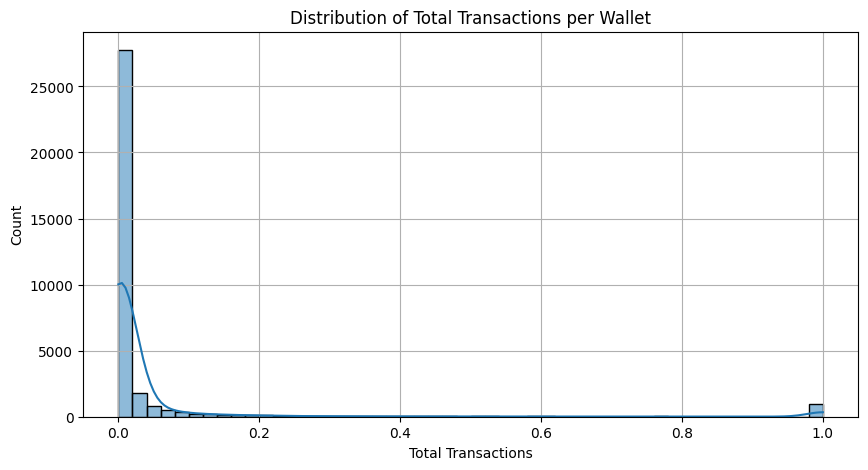

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['total_transactions'], bins=50, kde=True)
plt.title("Distribution of Total Transactions per Wallet")
plt.xlabel("Total Transactions")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("visualization/distribution_of_total_trx")
plt.show()

## Heatmap of Feature Correlation

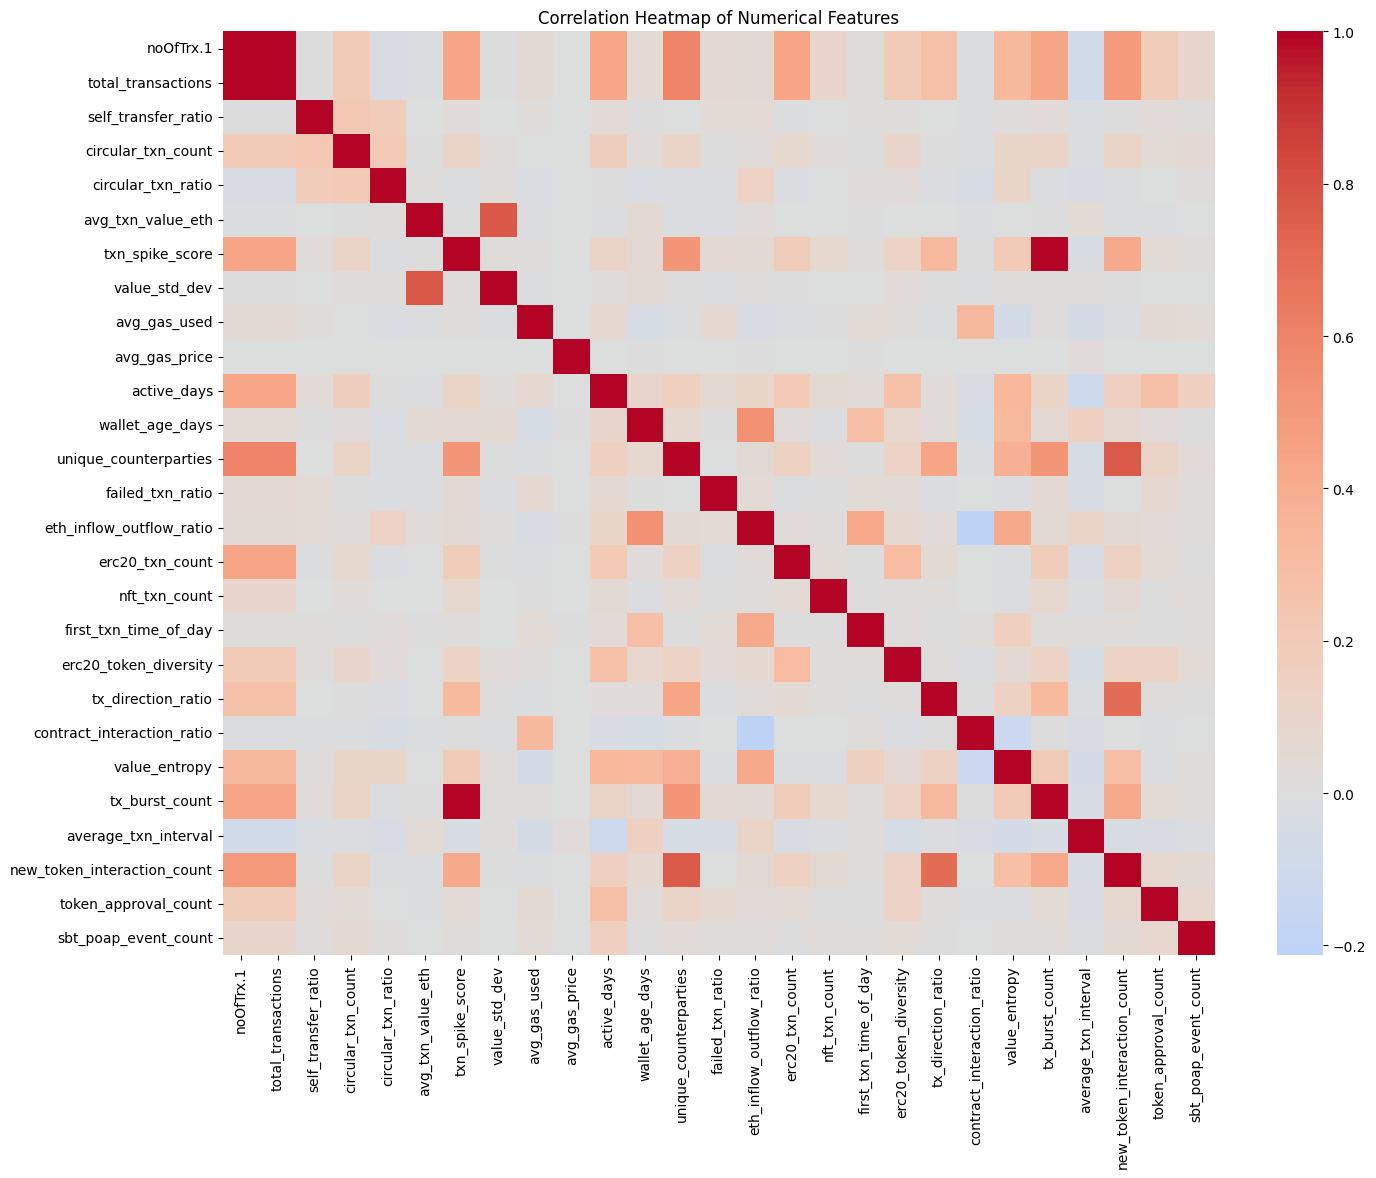

In [7]:
plt.figure(figsize=(16, 12))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig("visualization/heatmap_of_feature_correlation")
plt.show()

## Trustworthiness (isSafe) Distribution

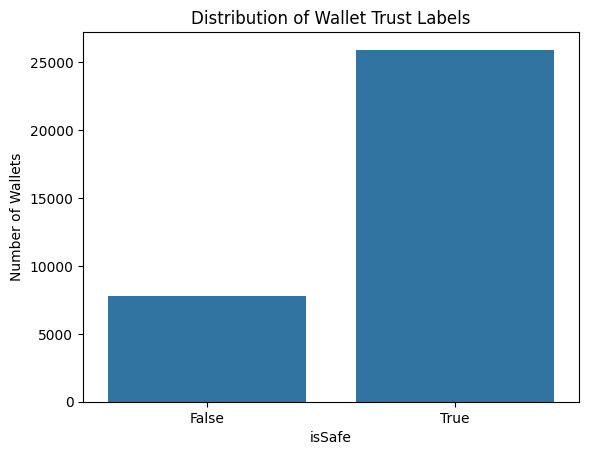

In [8]:
sns.countplot(data=df, x='isSafe')
plt.title("Distribution of Wallet Trust Labels")
plt.xlabel("isSafe")
plt.ylabel("Number of Wallets")
plt.savefig("visualization/distribution_of_wallet_trust_labels")
plt.show()


## Average Transaction Value by Trust Label

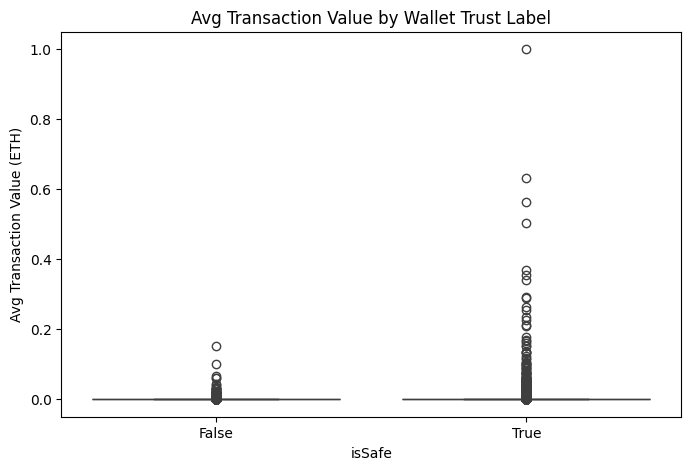

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='isSafe', y='avg_txn_value_eth')
plt.title("Avg Transaction Value by Wallet Trust Label")
plt.xlabel("isSafe")
plt.ylabel("Avg Transaction Value (ETH)")
plt.savefig("visualization/avg_trx_value_by_wallet_trust_label")
plt.show()


## Wallet Age Distribution

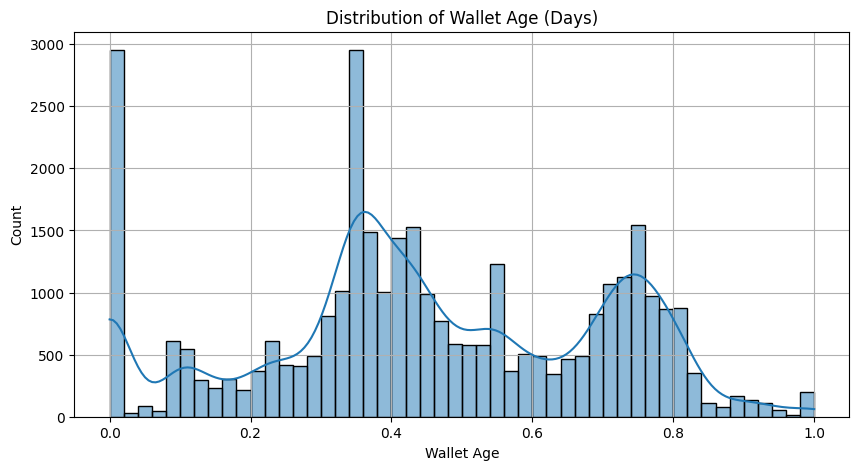

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['wallet_age_days'], bins=50, kde=True)
plt.title("Distribution of Wallet Age (Days)")
plt.xlabel("Wallet Age")
plt.ylabel("Count")
plt.grid(True)
plt.savefig("visualization/distribution_of_wallet_age")
plt.show()


## Circular Transactions Ratio vs Self Transfer Ratio

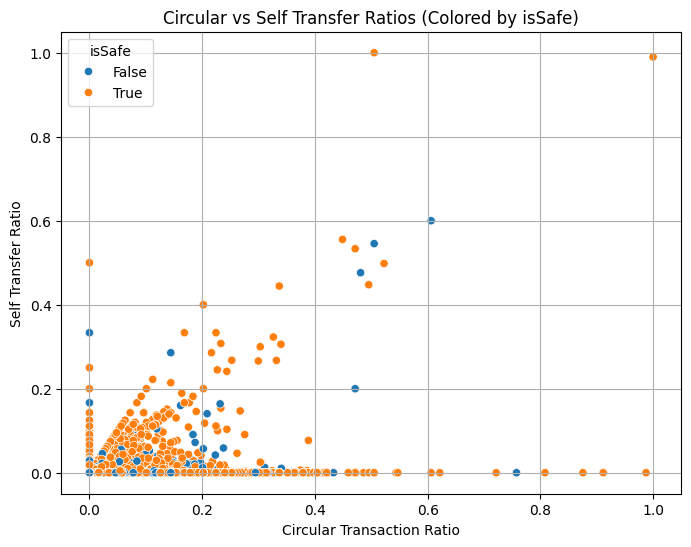

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='circular_txn_ratio', y='self_transfer_ratio', hue='isSafe')
plt.title("Circular vs Self Transfer Ratios (Colored by isSafe)")
plt.xlabel("Circular Transaction Ratio")
plt.ylabel("Self Transfer Ratio")
plt.grid(True)
plt.savefig("visualization/circular_vs_self_transfer_ratios")
plt.show()


## Active Days vs Transaction Count

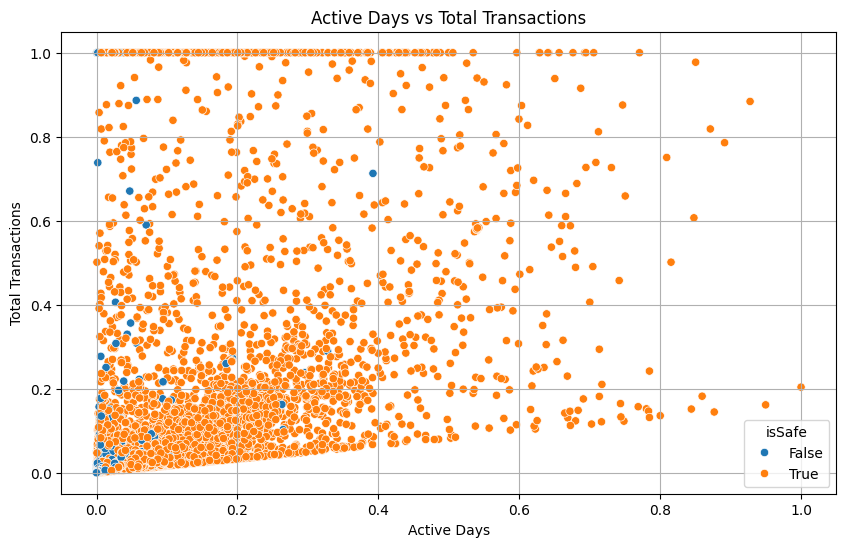

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='active_days', y='total_transactions', hue='isSafe')
plt.title("Active Days vs Total Transactions")
plt.xlabel("Active Days")
plt.ylabel("Total Transactions")
plt.grid(True)
plt.savefig("visualization/active_days_vs_total_trx")
plt.show()


## Token Approval Count Distribution

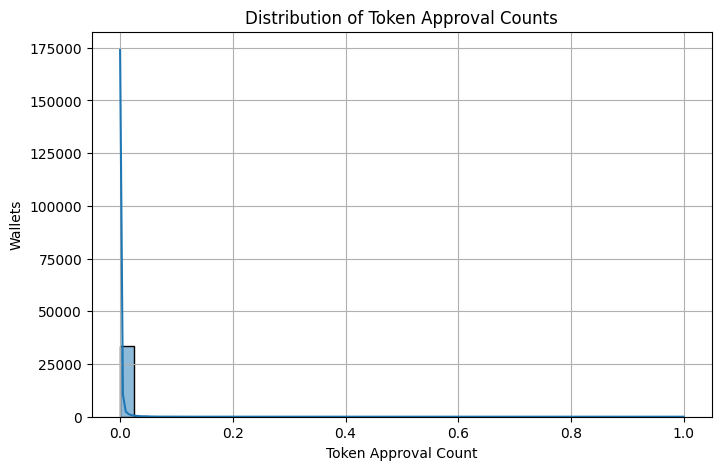

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['token_approval_count'], bins=40, kde=True)
plt.title("Distribution of Token Approval Counts")
plt.xlabel("Token Approval Count")
plt.ylabel("Wallets")
plt.grid(True)
plt.savefig("visualization/distribution_of_tkn_approval_counts")
plt.show()

## Entropy of Transaction Value

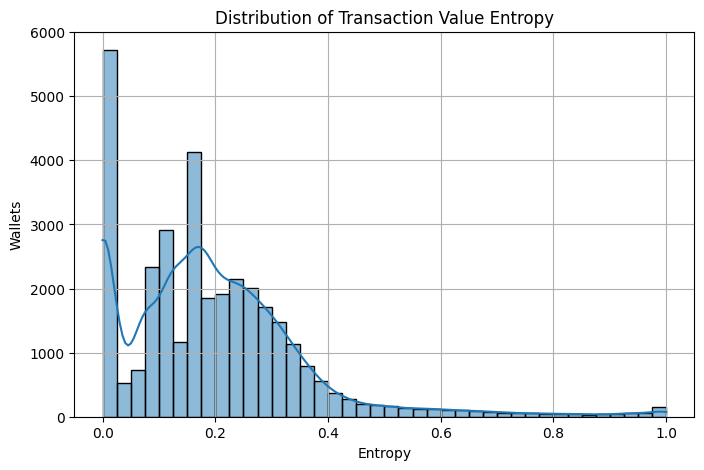

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['value_entropy'], bins=40, kde=True)
plt.title("Distribution of Transaction Value Entropy")
plt.xlabel("Entropy")
plt.ylabel("Wallets")
plt.grid(True)
plt.savefig("visualization/entropy_of_trx_value")
plt.show()


## Top Tags

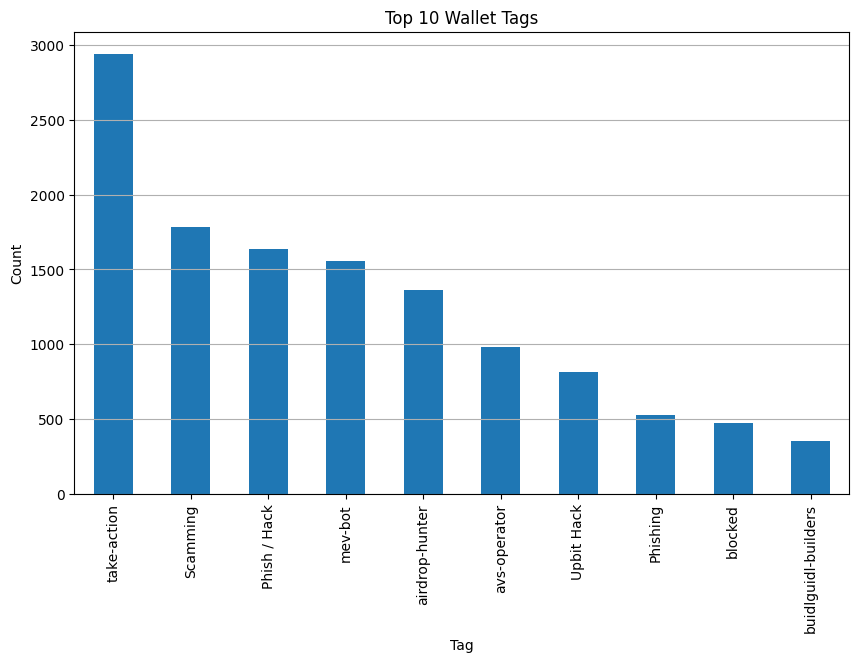

In [15]:
plt.figure(figsize=(10, 6))
df['Tags'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Wallet Tags")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.grid(axis='y')
plt.savefig("visualization/top_10_wallet_tags")
plt.show()


## Trust Score Features by Wallet Age Bucket

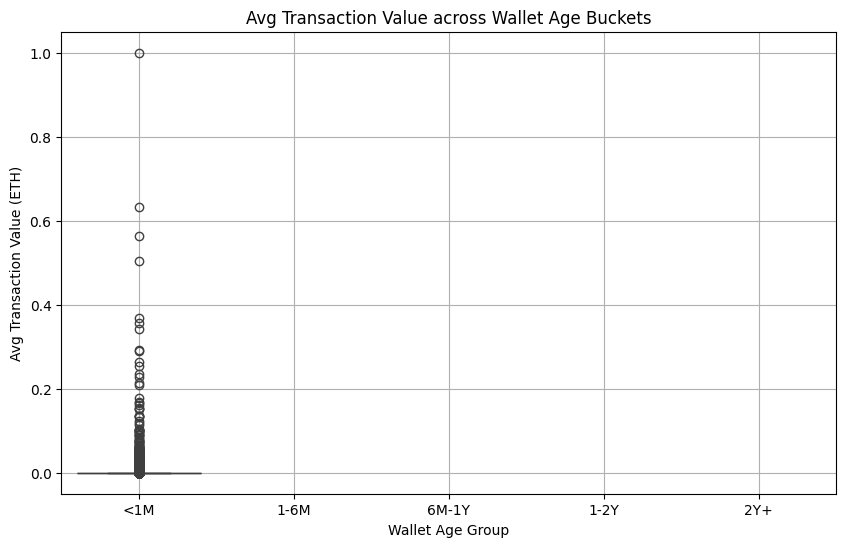

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.copy()
df2['wallet_age_group'] = pd.cut(df['wallet_age_days'], bins=[0, 30, 180, 365, 730, 2000], 
                                labels=['<1M', '1-6M', '6M-1Y', '1-2Y', '2Y+'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='wallet_age_group', y='avg_txn_value_eth')
plt.title('Avg Transaction Value across Wallet Age Buckets')
plt.xlabel('Wallet Age Group')
plt.ylabel('Avg Transaction Value (ETH)')
plt.grid(True)
plt.savefig("visualization/trust_score_features_by_wallet_age_bucket")
plt.show()


## Scatter Plot: Unique Counterparties vs. Transaction Volume

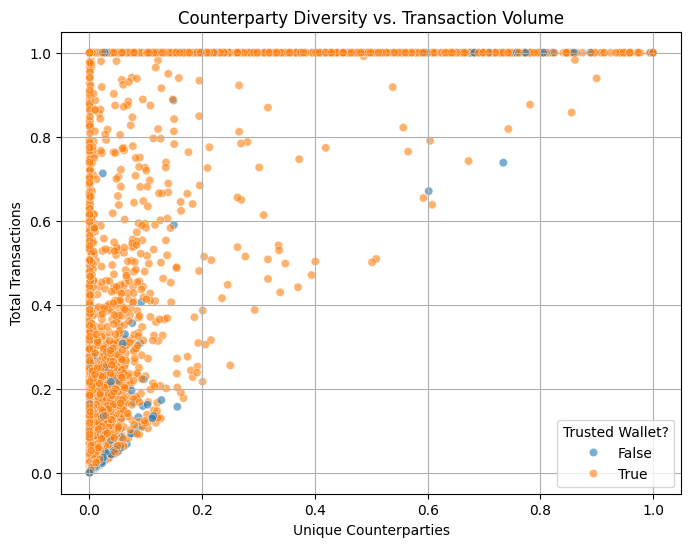

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df2, x='unique_counterparties', y='total_transactions', hue='isSafe', alpha=0.6)
plt.title('Counterparty Diversity vs. Transaction Volume')
plt.xlabel('Unique Counterparties')
plt.ylabel('Total Transactions')
plt.legend(title='Trusted Wallet?')
plt.grid(True)
plt.savefig("visualization/unique_counter_parties_vs_trx_vol")
plt.show()


## Distribution of Self-Transfer Ratios

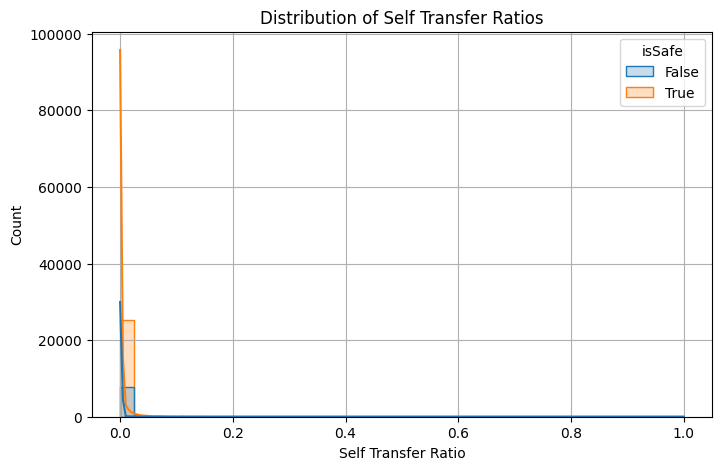

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df2, x='self_transfer_ratio', bins=40, hue='isSafe', kde=True, element='step')
plt.title('Distribution of Self Transfer Ratios')
plt.xlabel('Self Transfer Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.savefig("visualization/distribution_of_self_transfer_ratios")
plt.show()


## Contract Interaction Ratio across Tags

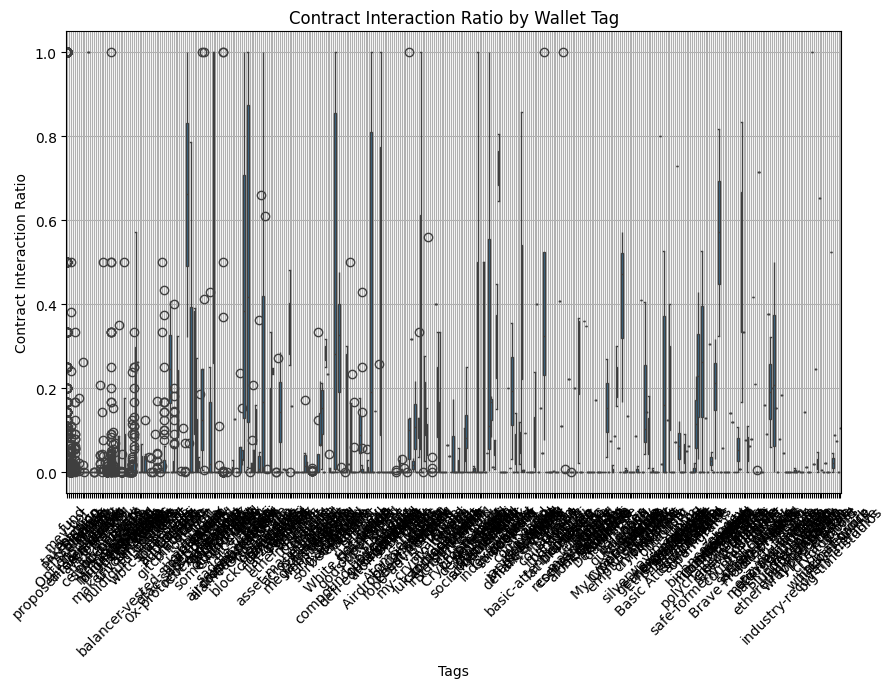

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2, x='Tags', y='contract_interaction_ratio')
plt.xticks(rotation=45)
plt.title('Contract Interaction Ratio by Wallet Tag')
plt.ylabel('Contract Interaction Ratio')
plt.grid(True)
plt.savefig("visualization/contract_interaction_ratio_across_tags")
plt.show()


## Entropy vs. Token Diversity (Bot detection marker)

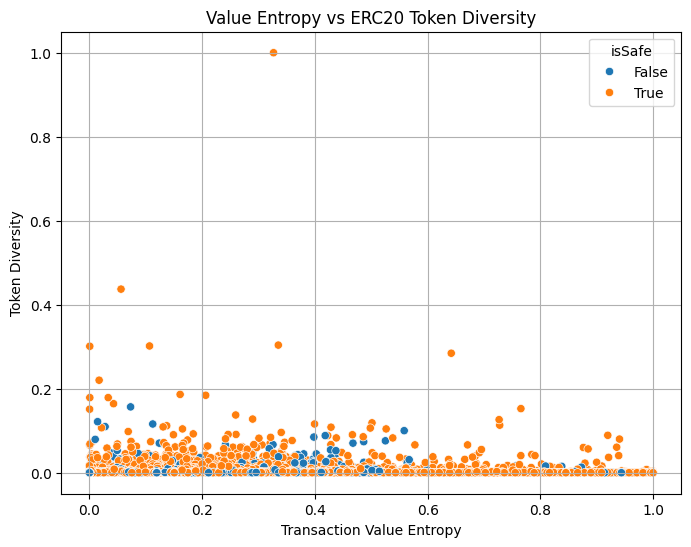

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df2, x='value_entropy', y='erc20_token_diversity', hue='isSafe')
plt.title('Value Entropy vs ERC20 Token Diversity')
plt.xlabel('Transaction Value Entropy')
plt.ylabel('Token Diversity')
plt.grid(True)
plt.savefig("visualization/entropy_vs_tkn_diversity")
plt.show()

## Failed Transaction Ratio by Wallet Age

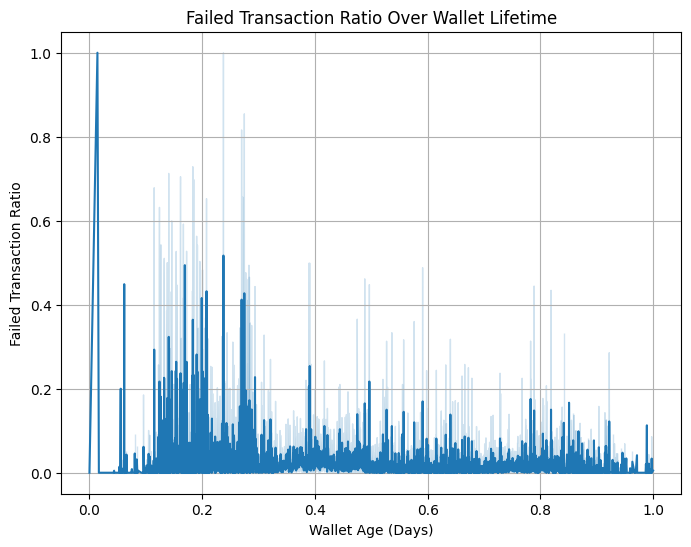

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df2, x='wallet_age_days', y='failed_txn_ratio')
plt.title('Failed Transaction Ratio Over Wallet Lifetime')
plt.xlabel('Wallet Age (Days)')
plt.ylabel('Failed Transaction Ratio')
plt.grid(True)
plt.savefig("visualization/failed_trx_ratio_by_wallet_age")
plt.show()


## Heatmap of Activity Patterns by Time of Day

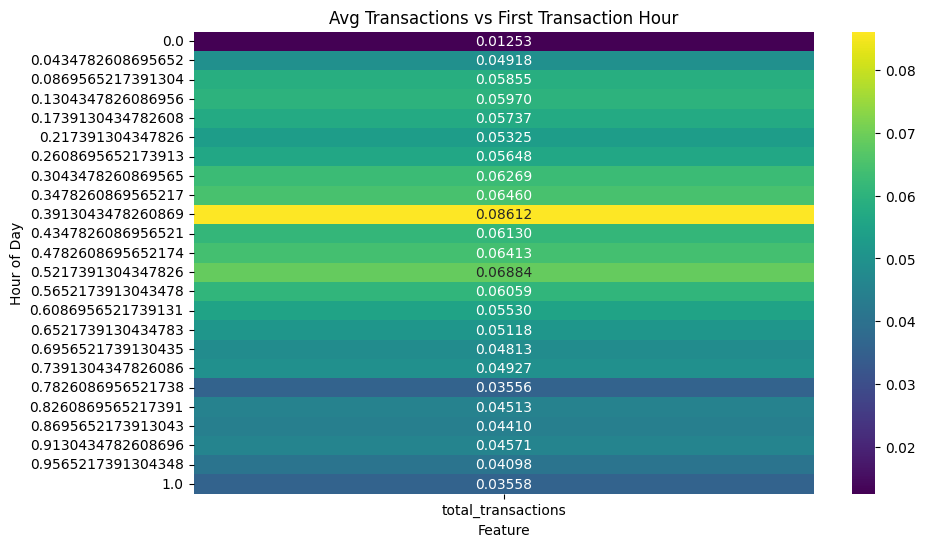

In [22]:
# Group wallets by hour of first transaction
hour_df = df2.groupby('first_txn_time_of_day').agg({'total_transactions': 'mean', 'isSafe': 'mean'}).reset_index()

plt.figure(figsize=(10,6))
sns.heatmap(hour_df.pivot_table(index='first_txn_time_of_day', values='total_transactions'), annot=True, fmt=".5f", cmap='viridis')
plt.title('Avg Transactions vs First Transaction Hour')
plt.xlabel('Feature')
plt.ylabel('Hour of Day')
plt.savefig("visualization/heatmap_of_activity_patterns_by_time_of_day")
plt.show()


# TOKEN APPROVALS

## Distribution of Token Approval Counts

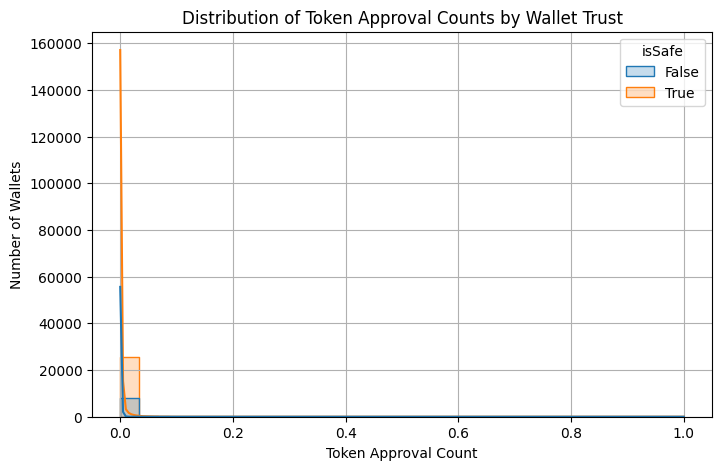

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data=df2, x='token_approval_count', bins=30, kde=True, hue='isSafe', element='step')
plt.title('Distribution of Token Approval Counts by Wallet Trust')
plt.xlabel('Token Approval Count')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.savefig("visualization/distribution_of_tkn_approval_counts")
plt.show()


## Top 15 Most Approved Tokens

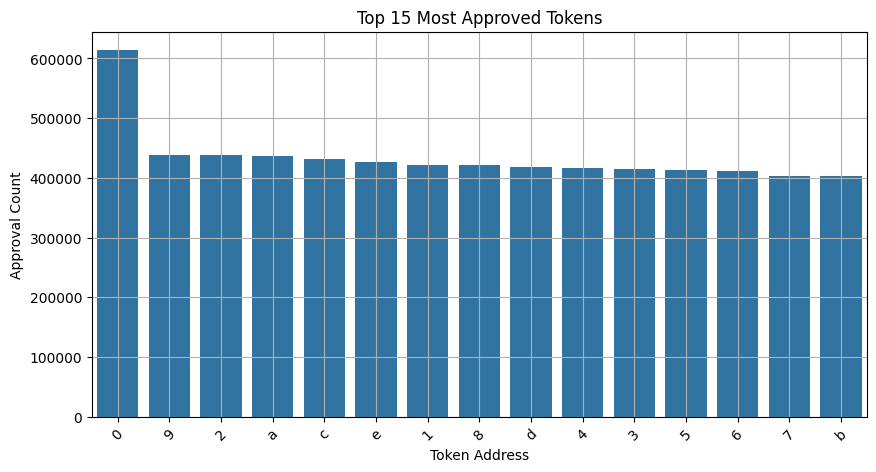

In [24]:
from collections import Counter
import itertools

# Flatten the token list
token_list_flat = list(itertools.chain.from_iterable(df2['approved_token_list'].dropna().tolist()))
top_tokens = Counter(token_list_flat).most_common(15)

tokens, counts = zip(*top_tokens)

plt.figure(figsize=(10,5))
sns.barplot(x=list(tokens), y=list(counts))
plt.title('Top 15 Most Approved Tokens')
plt.xlabel('Token Address')
plt.ylabel('Approval Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("visualization/15_most_approved_tokens")
plt.show()

## Boxplot: Token Approvals vs. Contract Interaction Ratio

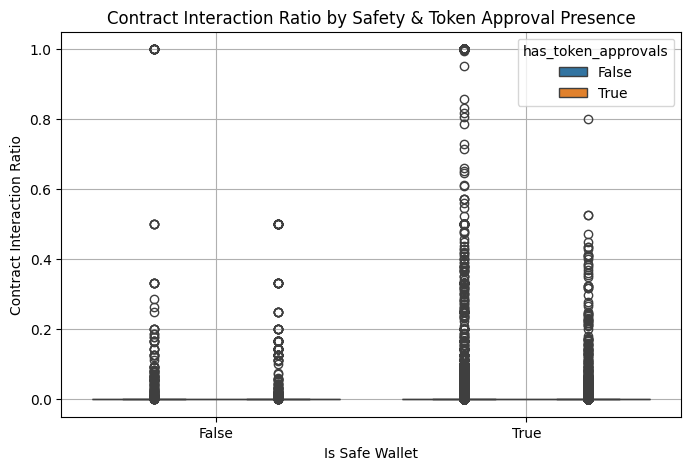

In [25]:
df2['has_token_approvals'] = df2['token_approval_count'].astype(float) > 0

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df2,
    x='isSafe',
    y='contract_interaction_ratio',
    hue='has_token_approvals'
)
plt.title('Contract Interaction Ratio by Safety & Token Approval Presence')
plt.xlabel('Is Safe Wallet')
plt.ylabel('Contract Interaction Ratio')
plt.grid(True)
plt.savefig("visualization/token_approvals_vs_contract_interaction_ratio")
plt.show()

## Heatmap: Token Approval vs. Failed Txn & Entropy

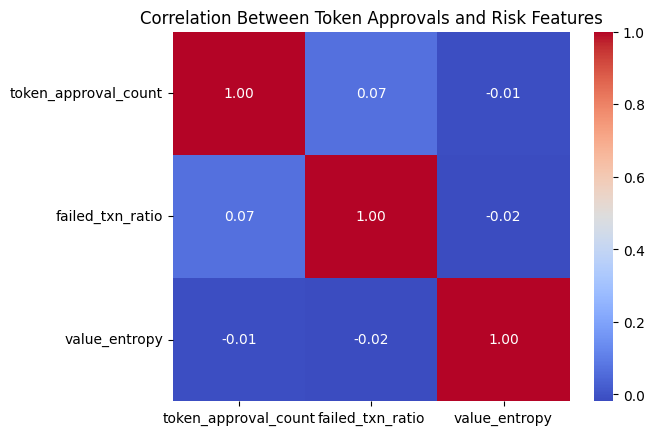

In [26]:
sns.heatmap(
    df2[['token_approval_count', 'failed_txn_ratio', 'value_entropy']].corr(), 
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Correlation Between Token Approvals and Risk Features')
plt.savefig("visualization/tkn_approval_vs_failed_trx_entropy")
plt.show()

## Scatter Plot: Token Approvals vs NFT Transactions

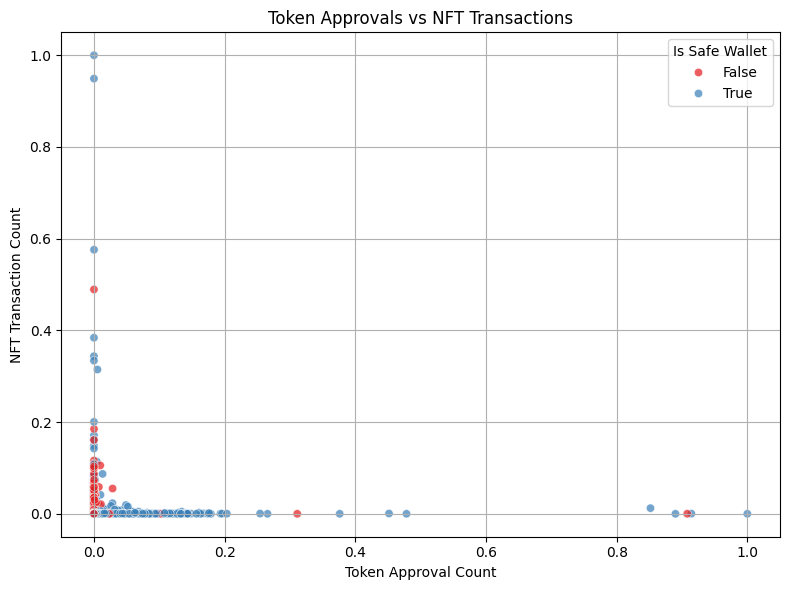

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df2,
    x='token_approval_count',
    y='nft_txn_count',
    hue='isSafe',
    palette='Set1',
    alpha=0.7
)

plt.title("Token Approvals vs NFT Transactions")
plt.xlabel("Token Approval Count")
plt.ylabel("NFT Transaction Count")
plt.grid(True)
plt.legend(title='Is Safe Wallet')
plt.tight_layout()
plt.savefig("visualization/tkn_approvals_vs_nft_trx")
plt.show()


## 4.B In Paper

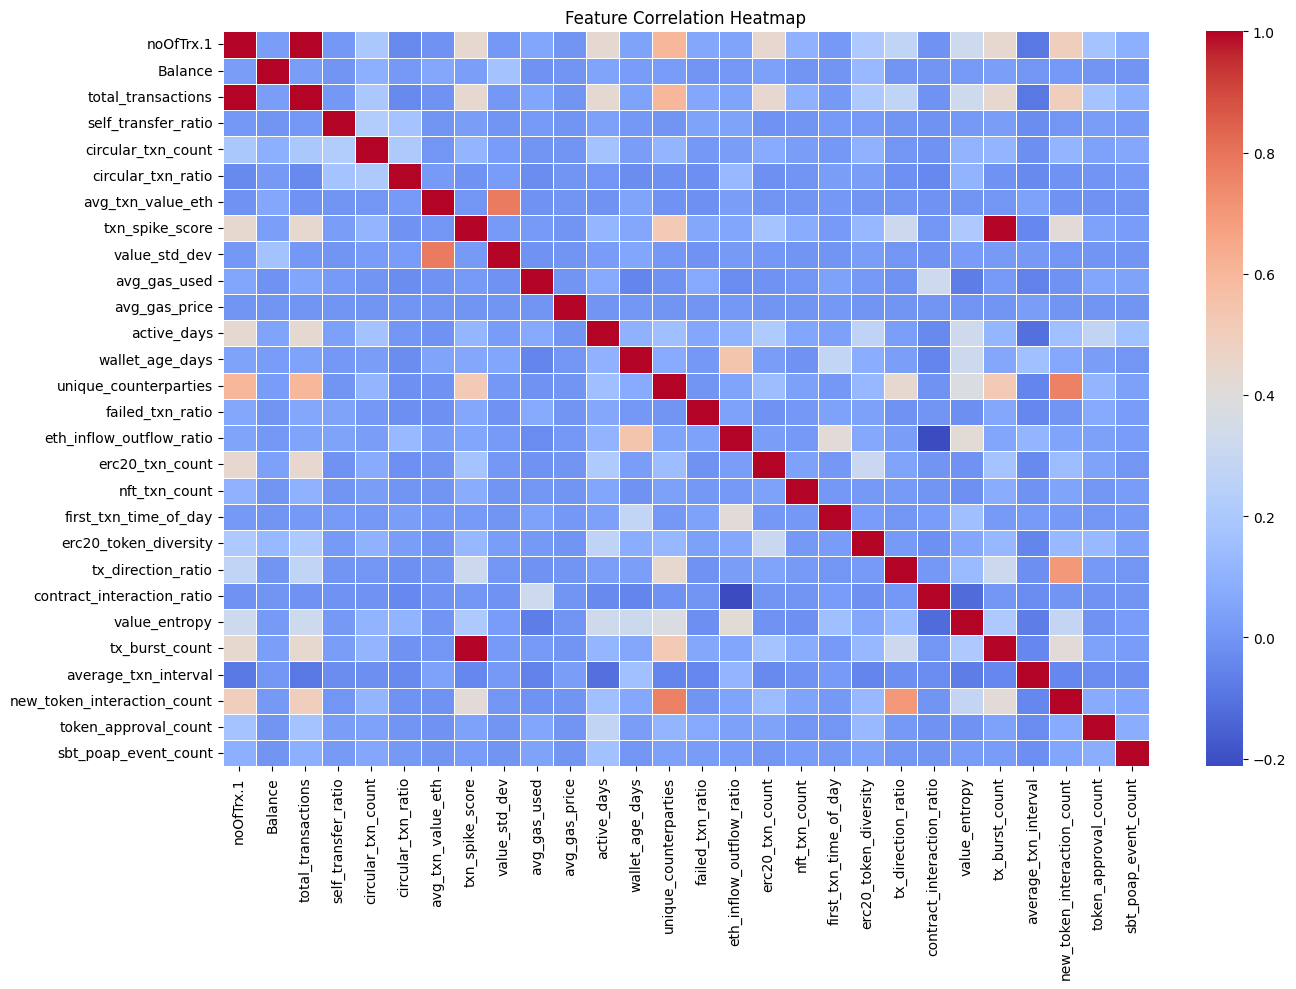

/var/folders/8q/t2_c8hp57v16vx8d9q_dhkfc0000gn/T/ipykernel_13037/1781767944.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


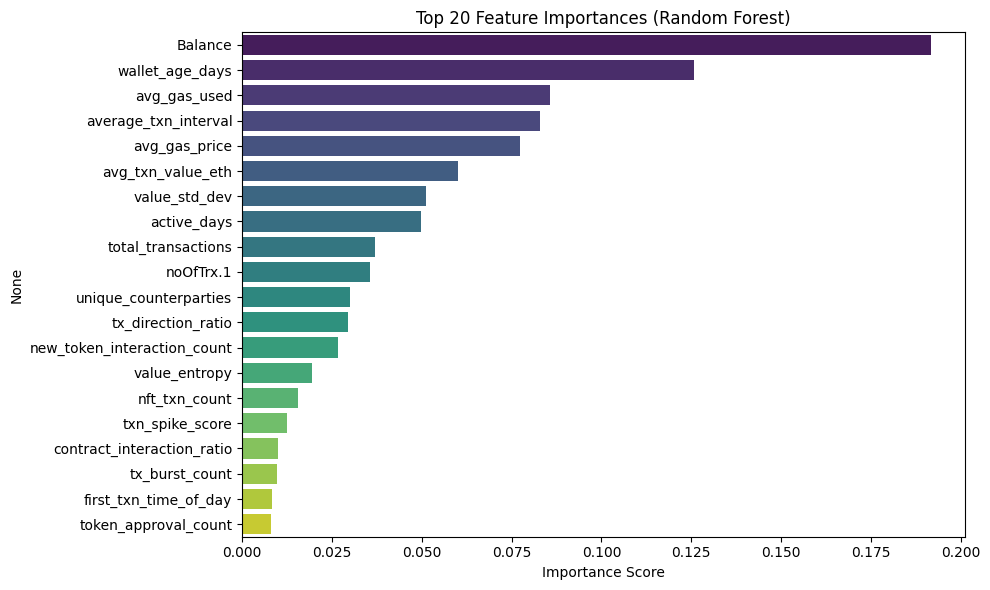

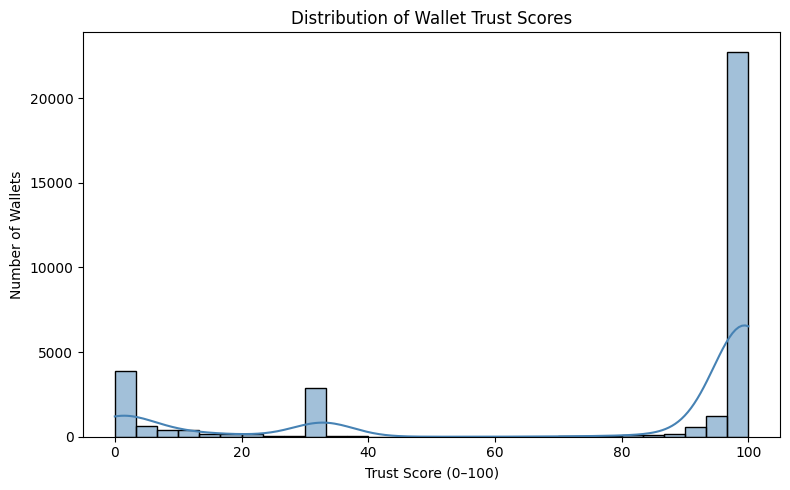

/var/folders/8q/t2_c8hp57v16vx8d9q_dhkfc0000gn/T/ipykernel_13037/1781767944.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isSafe', data=df, palette='Set2')


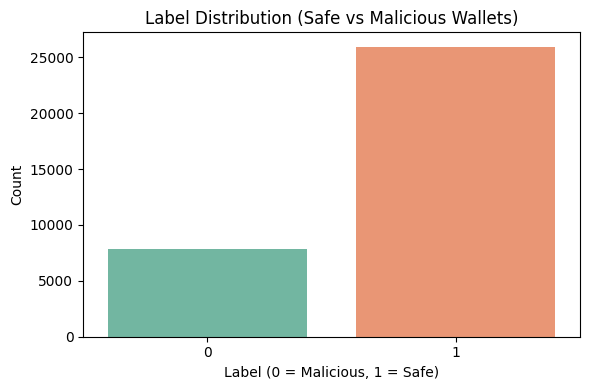

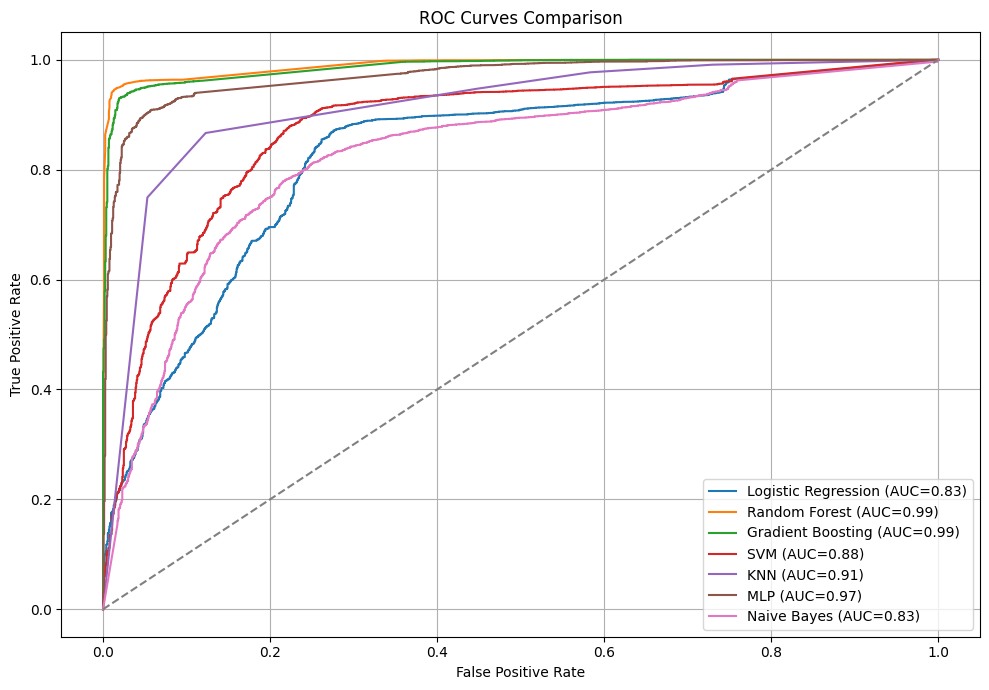

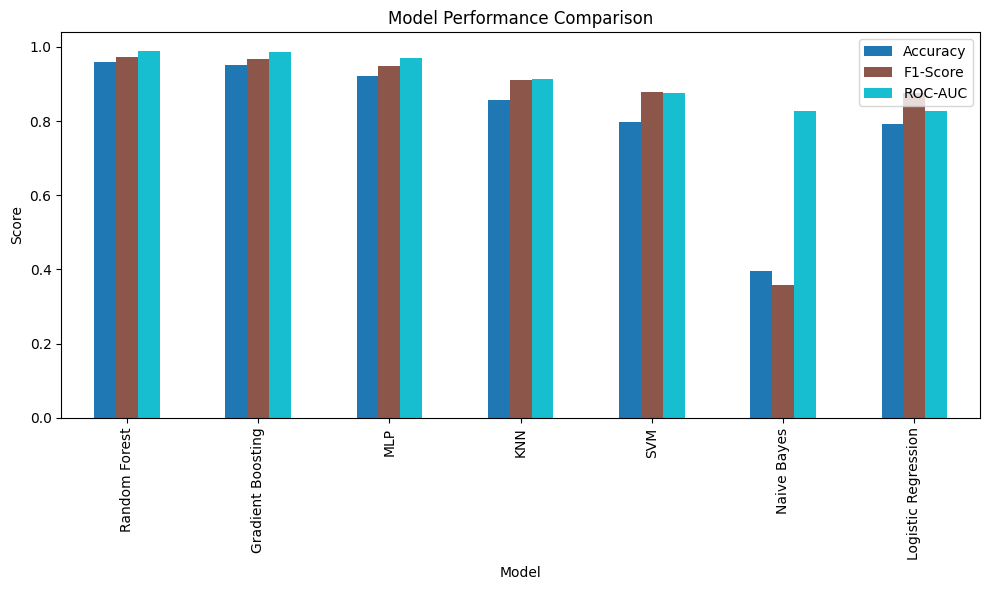

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# ------------------------ Prep ------------------------
non_feature_cols = ['Address', 'Name', 'Tags', 'Transactions', 'approved_token_list']
df['isSafe'] = df['isSafe'].astype(int)
df_cleaned = df.drop(columns=non_feature_cols, errors='ignore').fillna(0)

scaler = MinMaxScaler()
X = df_cleaned.drop(columns=['isSafe'])
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df_cleaned['isSafe']

# ---------------- 4.C Feature Engineering ----------------
plt.figure(figsize=(14, 10))
sns.heatmap(X_scaled.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("visualization/feature_correlation_heatmap.png")
plt.show()

# ---------------- 4.D Feature Importances ----------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("visualization/top_20_feature_importances.png")
plt.show()

# ---------------- 4.E Trust Score Generation ----------------
trust_scores = rf.predict_proba(X_scaled)[:, 1] * 100
plt.figure(figsize=(8, 5))
sns.histplot(trust_scores, bins=30, kde=True, color="steelblue")
plt.title("Distribution of Wallet Trust Scores")
plt.xlabel("Trust Score (0–100)")
plt.ylabel("Number of Wallets")
plt.tight_layout()
plt.savefig("visualization/trust_score_distribution.png")
plt.show()

# ---------------- 4.F Evaluation and Results ----------------

# Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='isSafe', data=df, palette='Set2')
plt.title("Label Distribution (Safe vs Malicious Wallets)")
plt.xlabel("Label (0 = Malicious, 1 = Safe)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("visualization/label_distribution.png")
plt.show()

# Model Comparison ROC
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42),
    "Naive Bayes": GaussianNB()
}

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

plt.figure(figsize=(10, 7))
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1-Score': round(f1, 4),
        'ROC-AUC': round(roc, 4)
    })

    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.2f})")

# ROC Curve
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("visualization/roc_curves_comparison.png")
plt.show()

# Summary Table Plot
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
results_df.set_index("Model")[["Accuracy", "F1-Score", "ROC-AUC"]].plot(kind="bar", figsize=(10, 6), colormap="tab10")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("visualization/model_comparison_barplot.png")
plt.show()
